In [17]:
import numpy as np
import matplotlib.pyplot as plt
import dill
import main

# Inserting all the needed data for v_a vs noise plot

name = input('Desired file name identification?\t')
with open( name + '_fixrhoswarm.csv',"rb") as pickle_in:  # "rb" because we want to read in binary mode
    bird_sim1 = dill.load(pickle_in)
name = input('Desired file name identification?\t')
with open( name + '_fixrhoswarm.csv',"rb") as pickle_in:  # "rb" because we want to read in binary mode
    bird_sim2 = dill.load(pickle_in)
name = input('Desired file name identification?\t')
with open( name + '_fixrhoswarm.csv',"rb") as pickle_in:  # "rb" because we want to read in binary mode
    bird_sim3 = dill.load(pickle_in)
name = input('Desired file name identification?\t')
with open( name + '_fixrhoswarm.csv',"rb") as pickle_in:  # "rb" because we want to read in binary mode
    bird_sim4 = dill.load(pickle_in)
name = input('Desired file name identification?\t')
with open( name + '_fixrhoswarm.csv',"rb") as pickle_in:  # "rb" because we want to read in binary mode
    bird_sim5 = dill.load(pickle_in) 
name = input('Desired file name identification?\t')
with open( name + '_fixrhoswarm.csv',"rb") as pickle_in:  # "rb" because we want to read in binary mode
    bird_sim6 = dill.load(pickle_in)     

Desired file name identification?	PL_Newetavar2pi_N40
Desired file name identification?	PL_Newetavar2pi_N100
Desired file name identification?	PL_Newetavar2pi_N400
Desired file name identification?	PL_Newetavar2pi_N1000
Desired file name identification?	PL_Newetavar2pi_N2000
Desired file name identification?	PL_Newetavar2pi_N4000


In [18]:
def autocorrelation_function(data):
    """
    Calculate the autocorrelation function of a given time series data.
    """
    n = len(data)
    mean = np.mean(data)
    autocorr = np.correlate(data - mean, data - mean, mode='full') / (np.var(data) * n)
    return autocorr[n - 1:]

def correlation_time(autocorr):
    """
    Calculate the correlation time from the autocorrelation function.
    """
    # Find the first index where autocorrelation drops below 0
    threshold = 0
    idx = np.argmax(autocorr < threshold)
    
    # The correlation time is the index where the autocorrelation drops below 0
    return idx

def error_calculator(va_matrix):
    """
    Calculate the errorbars for all the points in mean_va vs eta plot.
    """
    time = []
    for i in range(va_matrix.shape[0]):
        your_data = va_matrix[i, -50:]
        autocorr = autocorrelation_function(your_data)
        corr_time = correlation_time(autocorr)
        time.append(corr_time)

    final_corr_time = np.array(time)
    final_corr_time[final_corr_time == 0] = 1
    #print(final_corr_time)
    return np.std(va_matrix[:, -51:-1], axis=1) / np.sqrt(50 / final_corr_time)


In [37]:
np.shape(bird_sim10.N_matrix)

(49, 3)

# mean v_a vs noise 

/tmp/ipykernel_64/26317388.py:7: RuntimeWarning: invalid value encountered in divide
  autocorr = np.correlate(data - mean, data - mean, mode='full') / (np.var(data) * n)


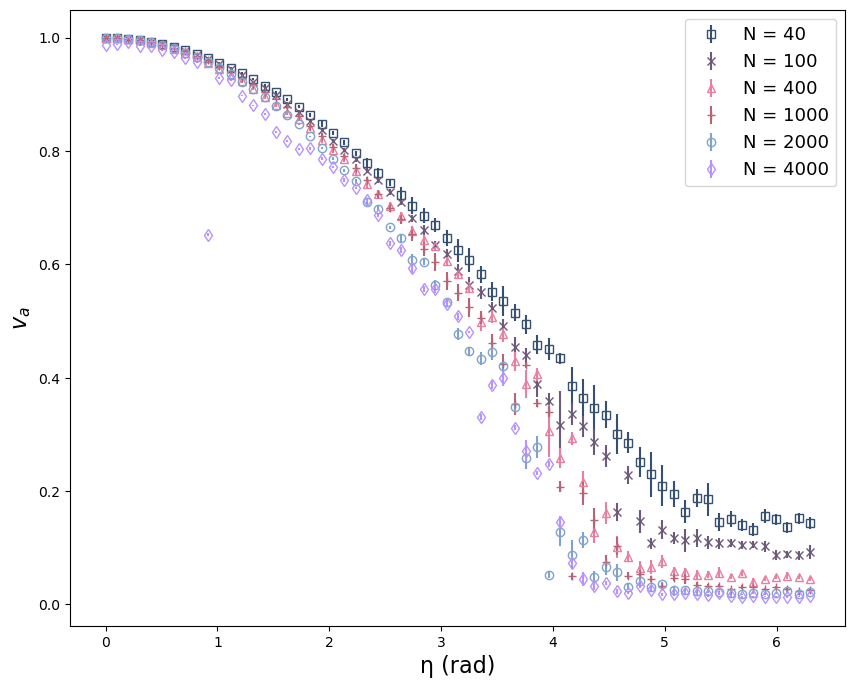

In [35]:
def plot_va_eta(eta_matrix, error,marker, marker_edge_color, line_color, labels):
    
    """
    eta_matrix is an (63, 3) array including [mean v_a, density, noise] for all the values of noise for a fixed number of particles N
    """
    
    plt.errorbar(eta_matrix[:, 2], eta_matrix[:, 0], yerr = error, xerr = None,
                 fmt = marker, ecolor = line_color, markerfacecolor = 'none',
                 markeredgecolor = marker_edge_color, label = labels)


plt.figure(figsize = (10, 8))


plot_va_eta(bird_sim1.eta_matrix, error_calculator(bird_sim1.va_matrix),'s', '#355070', '#355070', 'N = 40')
plot_va_eta(bird_sim2.eta_matrix, error_calculator(bird_sim2.va_matrix),'x', '#6d597a', '#6d597a', 'N = 100')
plot_va_eta(bird_sim3.eta_matrix, error_calculator(bird_sim3.va_matrix),'^', '#e87ea1', '#e87ea1', 'N = 400')
plot_va_eta(bird_sim4.eta_matrix, error_calculator(bird_sim4.va_matrix),'+', '#b56576', '#b56576', 'N = 1000')
plot_va_eta(bird_sim5.eta_matrix, error_calculator(bird_sim5.va_matrix),'o', '#7ea3cc', '#7ea3cc', 'N = 2000')
plot_va_eta(bird_sim6.eta_matrix, error_calculator(bird_sim6.va_matrix),'d', '#b892ff', '#b892ff', 'N = 4000')

#plt.title("Order Parameter vs Noise")
plt.xlabel('η (rad)', fontsize = 16)
plt.ylabel('$v_a$', fontsize = 16)
plt.legend(fontsize = 13)
#plt.grid(True)
plt.show()

# mean v_a vs density

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import dill
import main

# Inserting all the needed data for v_a vs density plot

name = input('Desired file name identification?\t')
with open( name + '_fixeta_swarm.csv',"rb") as pickle_in:  # "rb" because we want to read in binary mode
    bird_sim7 = dill.load(pickle_in)
name = input('Desired file name identification?\t')
with open( name + '_fixeta_swarm.csv',"rb") as pickle_in:  # "rb" because we want to read in binary mode
    bird_sim8 = dill.load(pickle_in)
name = input('Desired file name identification?\t')
with open( name + '_fixeta_swarm.csv',"rb") as pickle_in:  # "rb" because we want to read in binary mode
    bird_sim9 = dill.load(pickle_in)    

Desired file name identification?	A_NewNvar_eta2
Desired file name identification?	A_NewNvar_eta3
Desired file name identification?	A_NewNvar_eta4


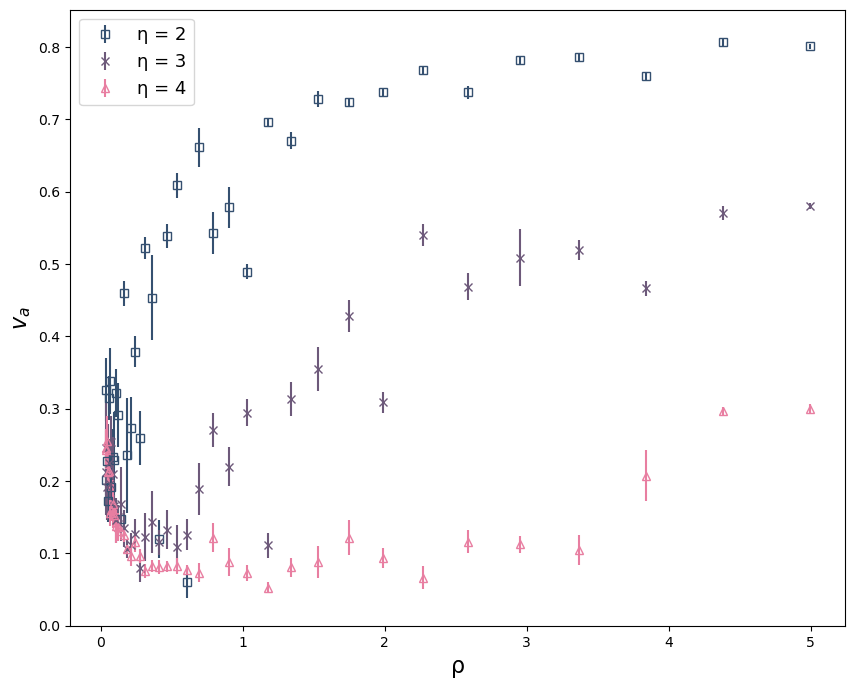

In [39]:
def plot_va_N(N_matrix, va_matrix, error,marker, marker_edge_color, line_color, labels):
    
    """
    N_matrix is an (49, 3) array including [mean v_a, density, noise] for all the values of density for a fixed value of noise
    """
    # Notice that since the data of very low density was too noisy, we decied to not to include them in plot and since N_matrix[0] = mean v_a including this data, we used np.mean(va_matrix[9:, -51:-1]). That is the reason that this plot function has one more input than the previous one.
    mean_v_a = np.mean(va_matrix[9:, -51:-1], axis = 1)
    plt.errorbar(N_matrix[10:, 1], mean_v_a, yerr = error[9:], xerr = None,
                 fmt = marker, ecolor = line_color, markerfacecolor = 'none',
                 markeredgecolor = marker_edge_color, label = labels)


plt.figure(figsize = (10, 8))

plot_va_N(bird_sim7.N_matrix, bird_sim7.va_matrix, error_calculator(bird_sim7.va_matrix), 's', '#355070', '#355070', 'η = 2')
plot_va_N(bird_sim8.N_matrix, bird_sim8.va_matrix, error_calculator(bird_sim8.va_matrix), 'x', '#6d597a', '#6d597a', 'η = 3')
plot_va_N(bird_sim9.N_matrix, bird_sim9.va_matrix, error_calculator(bird_sim9.va_matrix), '^', '#e87ea1', '#e87ea1', 'η = 4')

plt.xlabel('ρ', fontsize = 16)
plt.ylabel('$v_a$', fontsize = 16)
plt.legend(fontsize = 13)
#plt.grid(True)
plt.show()

# evolution of v_a 

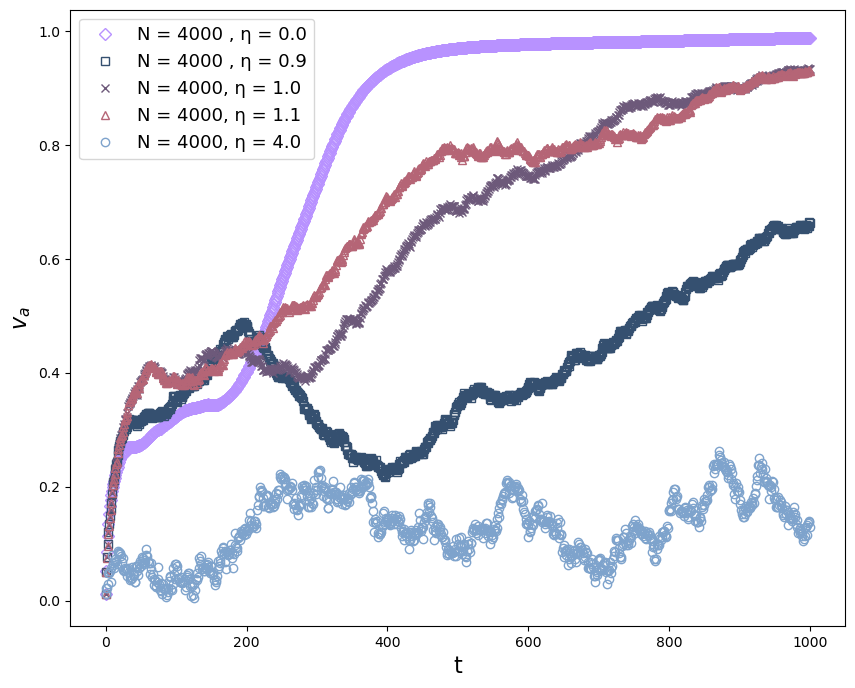

In [29]:
def plot_va_t(va_matrix, shape, color, labels, index):
    
    """
    Plot va_matrix, including va for each time step, for several value of noise to study the outlier data in the fisrt plot for N = 4000 
    """
    plt.xlabel('t', fontsize = 16)
    plt.ylabel('$v_a$', fontsize = 16)
    plt.plot(np.arange(0, len(va_matrix[index]), 1), va_matrix[index], shape, markerfacecolor = 'none', markeredgecolor = color, label = labels)
    plt.legend(fontsize = 13)
      
plt.figure(figsize = (10, 8)) 

plot_va_t(bird_sim6.va_matrix, 'D', '#b892ff', 'N = 4000, η = 0.0', 0) 
plot_va_t(bird_sim6.va_matrix, 's', '#355070', 'N = 4000, η = 0.9', 9) 
plot_va_t(bird_sim6.va_matrix, 'x', '#6d597a', 'N = 4000, η = 1.0', 10)
plot_va_t(bird_sim6.va_matrix, '^', '#b56576', 'N = 4000, η = 1.1', 11)
plot_va_t(bird_sim6.va_matrix, 'o', '#7ea3cc', 'N = 4000, η = 4.0', 40)

plt.show()

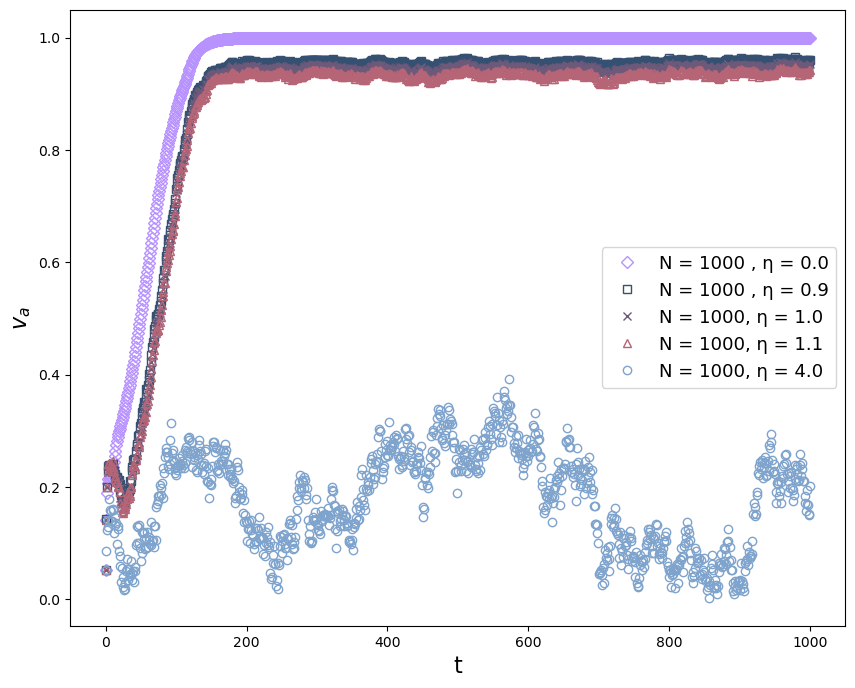

In [30]:
def plot_va_t(va_matrix, shape, color, labels, index):
    
    """
    Plot va_matrix, including va for each time step,for several values of noise for N = 1000 to compare with above plot. 
    """
    
    plt.xlabel('t', fontsize = 16)
    plt.ylabel('$v_a$', fontsize = 16)
    plt.plot(np.arange(0, len(va_matrix[index]), 1), va_matrix[index], shape, markerfacecolor = 'none', markeredgecolor = color, label = labels)
    plt.legend(fontsize = 13)
      
plt.figure(figsize = (10, 8))

plot_va_t(bird_sim4.va_matrix, 'D', '#b892ff', 'N = 1000, η = 0.0', 0) 
plot_va_t(bird_sim4.va_matrix, 's', '#355070', 'N = 1000, η = 0.9', 9) 
plot_va_t(bird_sim4.va_matrix, 'x', '#6d597a', 'N = 1000, η = 1.0', 10)
plot_va_t(bird_sim4.va_matrix, '^', '#b56576', 'N = 1000, η = 1.1', 11)
plot_va_t(bird_sim4.va_matrix, 'o', '#7ea3cc', 'N = 1000, η = 4.0', 40)

plt.show()